<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___


# Исследование компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. <br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План работы

<b> Шаг 1. Открытие файла с данными и изучение общей информации </b>

<b> Шаг 2. Подготовка данных </b>

- Замена названий столбцов (приведение к нижнему регистру);
- Преобразование данных в нужные типы;
- Обработка пропусков;
- Посчет суммарных продаж во всех регионах и запись их в отдельный столбец.

<b> Шаг 3. Проведение исследовательского анализа данных </b>

- Посмотр, сколько игр выпускалось в разные годы;
- Посмотр, как менялись продажи по платформам;
- Анализ данных за актуальный период;
- Определение потенциально прибыльных платформ;
- Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Посмотр, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- Соотнесение выводов с продажами игр на других платформах;
- Посмотр общего распределения игр по жанрам.

<b> Шаг 4. Составлене портрета пользователя каждого региона </b>

- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Определение, влияет ли рейтинг ESRB на продажи в отдельном регионе.

<b> Шаг 5. Проверка гипотез </b>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

<b> Шаг 6. Общий вывод </b>

## Изучение данных из файла

In [705]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [706]:
df = pd.read_csv('/datasets/games.csv')

In [707]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [708]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

В файле с данным содержится 16715 строк, 11 столбцов. Типы данных: строковый и вещественный. Объем данных порядка 1,4 МБ. В столбцах Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропущенные значения. Столбцы Year_of_Release, User_Score имеют некорректные типы данных. Названия столбцов начинаются с заглавной буквы. 


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Подготовка данных

### Замена названий столбцов (приведите к нижнему регистру)

In [710]:
df.columns = df.columns.str.lower()

In [711]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

In [712]:
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

In [713]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [714]:
df['user_score'] = df['user_score'].replace("tbd", np.NaN, regex=True)
df['user_score'] = df['user_score'].astype('Float64')

In [715]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Для столбцов platform, genre, rating выполнено приведение к категориальному типу данных, так как количество возможных значений в данных столбцах ограничено. <br>
Столбцец year_of_release приведен к целочисленному типу данных. <br>
В столбце user_score выполнена замена аббревиатуры "tbd" ("to be determined" - "пользователи не определились с оценкой") на NaN для удобства дальнейшей работы с данными, а сами данные приведены к вещественному типу.

### Обработка пропущенных значений

<i>Пропущенные значения в столбце 'name'</i>

In [716]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [717]:
df.dropna(subset=['name'], inplace=True)

<i>Пропущенные значения в столбце 'year_of_release'</i>

In [718]:
print('Количество пропущенных значений в столбце "year_of_release": ', df['year_of_release'].isna().sum())

Количество пропущенных значений в столбце "year_of_release":  269


In [719]:
print('Объем данных с отсутсвующей информацией о годе выпуска игры: {:.2%}'.format(len(df[df['year_of_release'].isna()]) / len(df)))

Объем данных с отсутсвующей информацией о годе выпуска игры: 1.61%


<i>Пропущенные значения в столбце 'critic_score', 'user_score', 'rating'</i>

In [720]:
print('Объем данных с отсутсвующей информацией в столбце "critic_score": {:.2%}'.format(len(df[df['critic_score'].isna()]) / len(df)))

Объем данных с отсутсвующей информацией в столбце "critic_score": 51.31%


In [721]:
print('Объем данных с отсутсвующей информацией в столбце "user_score": {:.2%}'.format(len(df[df['user_score'].isna()]) / len(df)))

Объем данных с отсутсвующей информацией в столбце "user_score": 54.59%


In [722]:
print('Объем данных с отсутсвующей информацией в столбце "rating": {:.2%}'.format(len(df[df['rating'].isna()]) / len(df)))

Объем данных с отсутсвующей информацией в столбце "rating": 40.47%


### Вывод

В столбце 'name' есть 2 пропущенных значения. Срез по ним показал, что в данных строках также отсутствует информация о жанре игры, оценке критиков и пользователей, а также о рейтинге игры. Так как не известно о какой игре идет речь, не известен ее жанр и рейтинг, то принято решение удалить эти строки из выборки. <br>
В столбце 'year_of_release' объем пропущенных значений составляет 1,61%. Заполнять пропущенные значения в данном столбце любыми другими (медиана, 0 и т.п.) будет являться не уместным, а их удаление может привести к искажению результатов исследования. Поэтому принято решение оставить пустые значения. <br>
Пропущенные значения в столбцах critic_score, user_score и rating составляют соответственно 51,31%, 54,59% и 40,47%. Возможная причина большого количества пропусков - давность и неактуальность игр. Заполнение пропущенных значений в данных столбцах медианными, средними или нулевыми значениями может сильно исказить результаты исследования, поэтому также как и в столбце 'year_of_release' принято решение оставить данные без изменений.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

### Суммарные продажи во всех регионах

In [723]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [724]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Статистика количества игр по годам

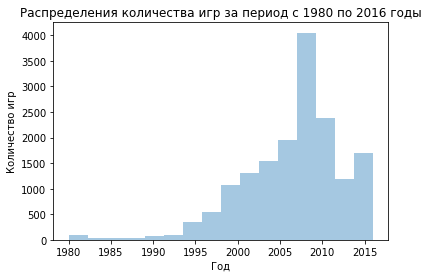

In [725]:
sns.distplot(df['year_of_release'], kde=False, bins=16)
plt.title('Распределения количества игр за период с 1980 по 2016 годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

### Вывод

Активный рост производтсва компьютерных игр начался, приблизительно, с 1994 года, а больше всего компьютерных игр было выпущено в период с 2005 по 2010 года с пиком в 2008-2009 годах. Связано это, скорее всего, с наиболее активным развитием компьютерных технологий, ростом популярности игровых платформ. Далее, примерно, с 2010 года начался спад производства компьютерных игр, что, вероятнее всего, связано с очень активным развитием рынка приложений под мобильные устройства.

### Исследование продаж в зависимости от платформы

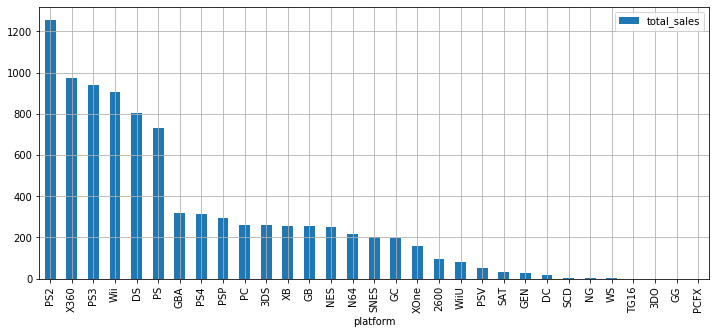

In [726]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(grid=True, figsize=(12, 5), kind="bar")
plt.show()

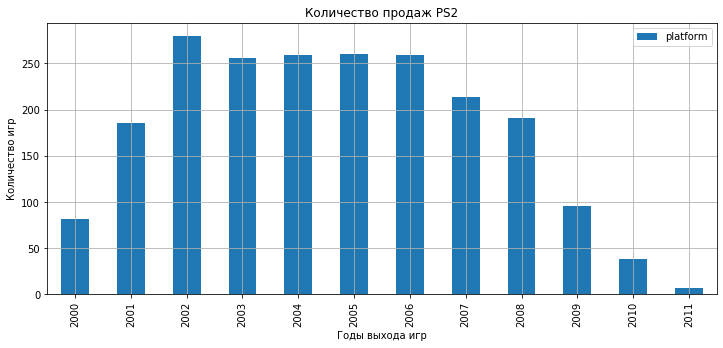

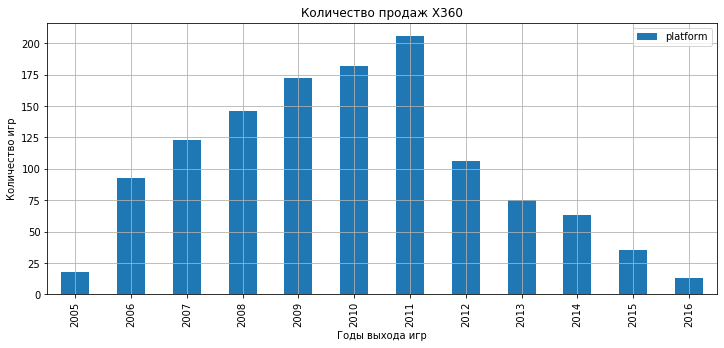

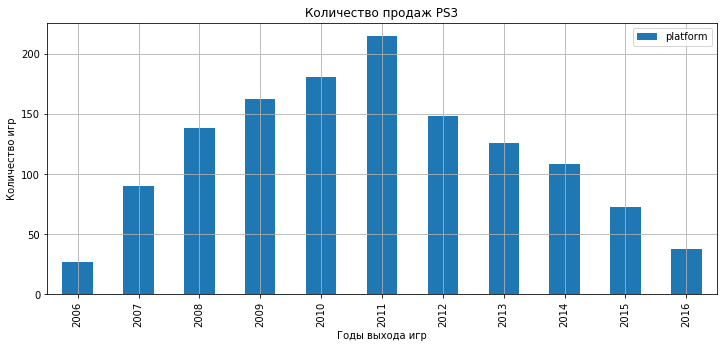

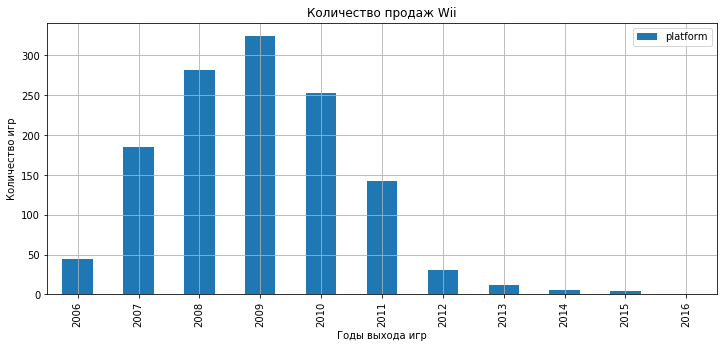

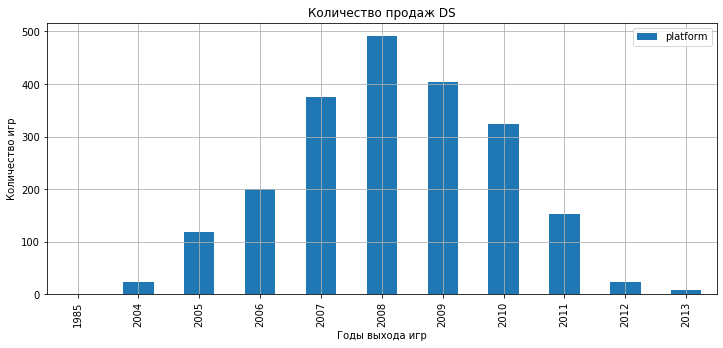

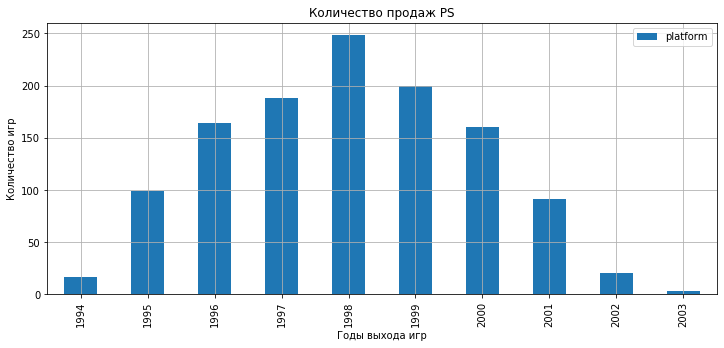

In [727]:
for elem in df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index:
    df.query('platform == @elem').pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(grid=True, figsize=(12, 5), kind="bar")
    title = 'Количество продаж ' + elem
    plt.title(title)
    plt.xlabel('Годы выхода игр')
    plt.ylabel('Количество игр')

### Вывод

В соответстви с графиком распределения продаж выделено топ-6 игровых платформ: PS2, X360, PS3, Wii, DS и PS. <br>
Характерный период существования топовых игровых платформ 7-12 лет. <div class="alert alert-block alert-info"> Период пиковых продаж наступает через 3-7 лет и составляет, приблизительно, 1 год, после чего продажи начинают падать. </div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно, но думаю, тут можно автоматизировать код с помощью цикла:  
    
<pre>
for elem in df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index:
    df.query('platform == @elem').pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(grid=True, figsize=(12, 5), kind="bar")
    title = 'Количество продаж ' + elem
    plt.title(title)
    plt.xlabel('Годы выхода игр')
    plt.ylabel('Количество игр')
</pre>
</div>

### Исследование данных за актуальный период

<div class="alert alert-block alert-info">В качестве актуального периода выберем данные с 2013 года</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Нужно изменить актуальный период.

Если мы будем рассматривать данные с 2005 по 2016 гг, то захватим период смены тренда на рынке видеоигр, плюс мы видим по графикам выше, что многие платформы за это время успели потерять свою популярность.

Еще подумай, пожалуйста, о жизненном цикле продукта, через сколько лет после релиза у платформ наступает пик продаж? Будет здорово, если в актуальный период не попадут старые тренды, которые могут негативно повлиять на наши рекомендации.
</div>



In [728]:
df = df.query('year_of_release >= 2015')

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2</b>
    
В комментарии указан 2013 год, а фильтруешь ты по 2015. Как-то не очень понятно. Но в целом, и тот, и другой год нам подходят.
</div>

In [729]:
data = []

for platform in df['platform'].unique():
    data.append(
        go.Bar(x=df[df.platform==platform].groupby('year_of_release')['total_sales'].sum().index,
               y=df[df.platform==platform].groupby('year_of_release')['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи игр за период с 2015 по 2016 годы'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

In [730]:
data = []
for item in df['platform'].unique():
    data.append(
        go.Box(y=df[df.platform==item]['total_sales'], 
               name=item )
    )
    
layout = {'title': 'Продажи по платформам'}
fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis=dict(range=[0,1]))
iplot(fig, show_link = False)

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Отличные графики
</div>


### Вывод

<div class="alert alert-block alert-info"> При анализе графиков, постороенных за период с 2015-2016 года, можно выделить несколько потенциально прибыльных платформ: PS4, XOne, 3DS. <br>
В соответствии с графиком «ящик с усами» самыми успешными по реализации игр платформами являются XOne, WiiU, PS4. </div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно. 
    
Но при написании вывода стоит учитывать, что у нас неполные данные за 2016 год (об этом сказано в задании), поэтому мы не можем говорить, что в 2016 году продажи падают.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Все верно

</div>

### Исследование влияния отзывов пользователей и критиков 

In [731]:
df_PS4 = df.query('platform == "PS4"').reset_index(drop=True)

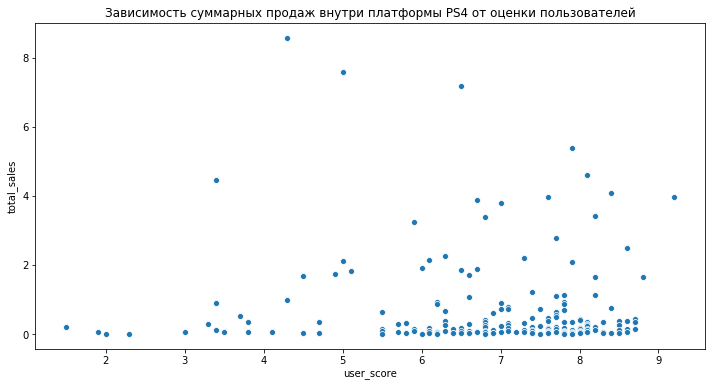

In [732]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'user_score', y = 'total_sales', data = df_PS4)
plt.title('Зависимость суммарных продаж внутри платформы PS4 от оценки пользователей')
plt.show()

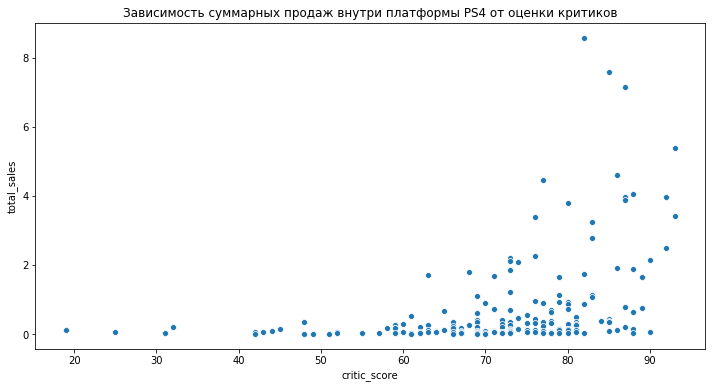

In [733]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = df_PS4)
plt.title('Зависимость суммарных продаж внутри платформы PS4 от оценки критиков')
plt.show()

In [734]:
df_PS4['user_score'].corr(df_PS4['total_sales']).round(2)

-0.06

In [735]:
df_PS4['critic_score'].corr(df_PS4['total_sales']).round(2)

0.39

<b>Матрицы корреляций для топ-5 платформ</b>

In [736]:
print("Матрица корреляций для XOne")
df[df.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций для XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.430889,-0.041467
critic_score,0.430889,1.000000,0.459443
user_score,-0.041467,0.459443,1.000000


In [737]:
print("Матрица корреляций для 3DS")
df[df.platform == "3DS"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций для 3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.177575,0.198796
critic_score,0.177575,1.000000,0.791853
user_score,0.198796,0.791853,1.000000


In [738]:
print("Матрица корреляций для WiiU")
df[df.platform == "WiiU"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций для WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.317046,0.363519
critic_score,0.317046,1.000000,0.678858
user_score,0.363519,0.678858,1.000000


### Вывод

Рассмотрена популярная игровая платформа PS4. <br>
Как видно на диаграммах рессеяния оценка пользователей не оказывает влияния на суммарные продажи, в то же время оценка критиков имеет несколько больший вес на объем продаж. <br>
Схожая тенденция наблюдается и у других платформ: оценка пользователей не оказывает существенного влияния на продажи, оценка критиков несколько весомее, но также не является определяющим фактором для количества продаж.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно определила зависимость продаж от оценок
</div>


### Распределение игр по жанрам

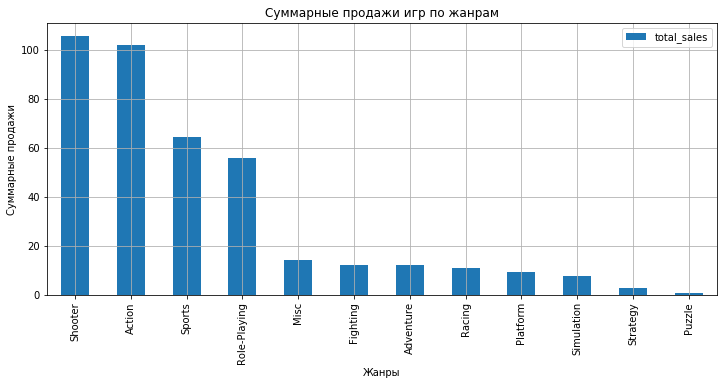

In [739]:
df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(grid=True, figsize=(12, 5), kind='bar')
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.show()

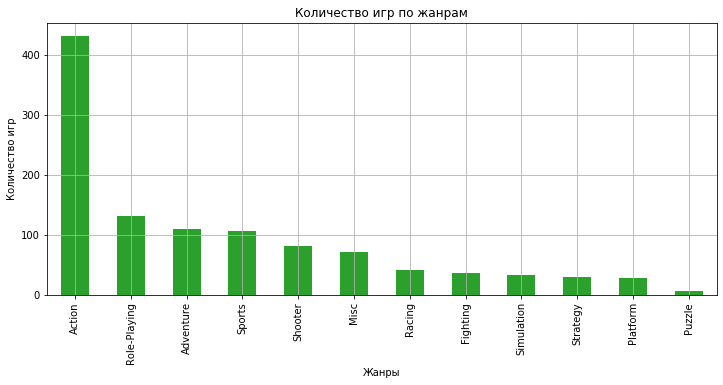

In [740]:
df['genre'].value_counts().plot(grid=True, figsize=(12, 5), kind='bar', color='tab:green')
plt.title('Количество игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.show()

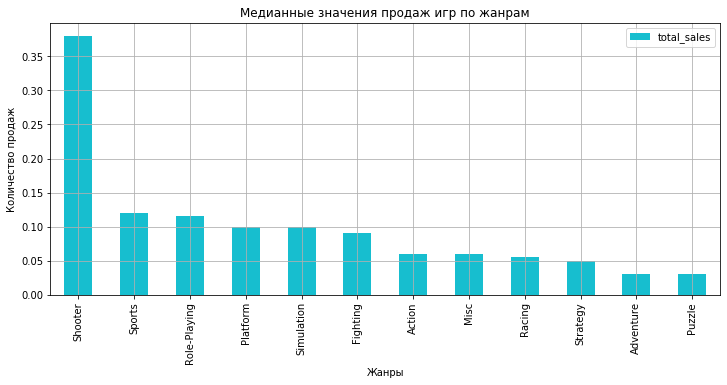

In [759]:
df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).plot(grid=True, figsize=(12, 5), kind='bar', color='tab:cyan')
plt.title('Медианные значения продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')
plt.show()

### Вывод

<div class="alert alert-block alert-info">
Больше всего было выпущено игр жанра Action, при этом игры жанра Shooter, обычно, продаются лучше, нежели игры жанра Action. 
Наименее популярные жанры Strategy, Adventure, Puzzle. </div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что посчитала суммарные продажи по жанрам
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Давай еще посчитаем количество игр в каждом жанре. Если значения будут сильно различаться в зависимости от жанра, нужно будет посчитать медианные продажи игр по жанрам, чтобы узнать какие игры обычно продаются лучше.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что дополнила исследование

</div>

## Портрет пользователей по регионам

### Топ-5 самых популярных платформ

<i>Северная Америка</i>

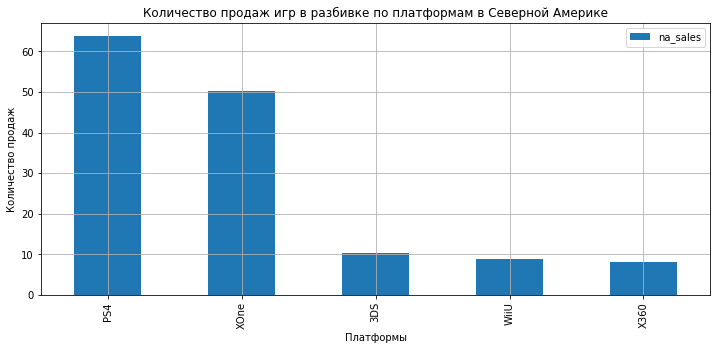

In [742]:
df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по платформам в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

<i>Европа</i>

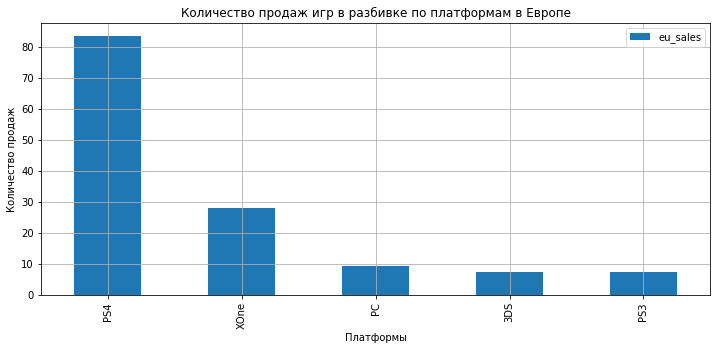

In [743]:
df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по платформам в Европе')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

<i>Япония</i>

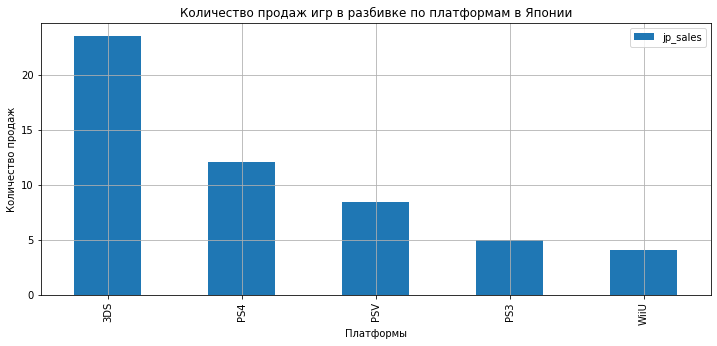

In [744]:
df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по платформам в Японии')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

### Топ-5 самых популярных жанров

<i>Северная Америка</i>

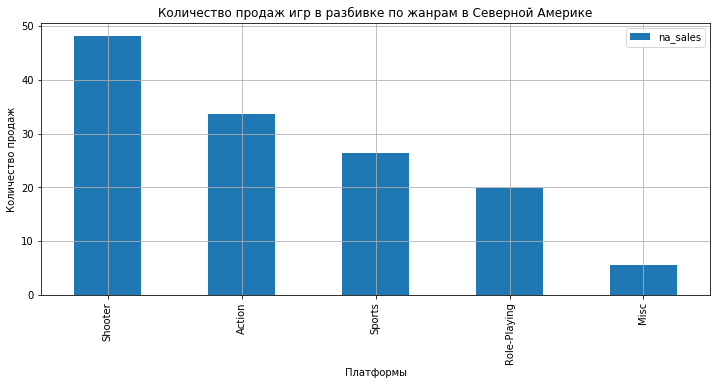

In [745]:
df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по жанрам в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

<i>Европа</i>

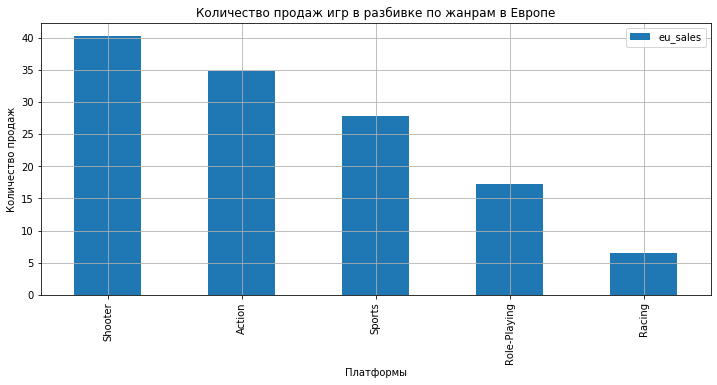

In [746]:
df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по жанрам в Европе')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

<i>Япония</i>

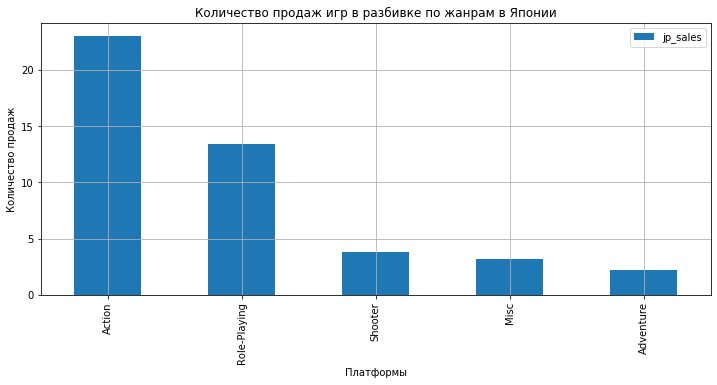

In [747]:
df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Количество продаж игр в разбивке по жанрам в Японии')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

### Исследование влияния рейтинга ESRB на продажи

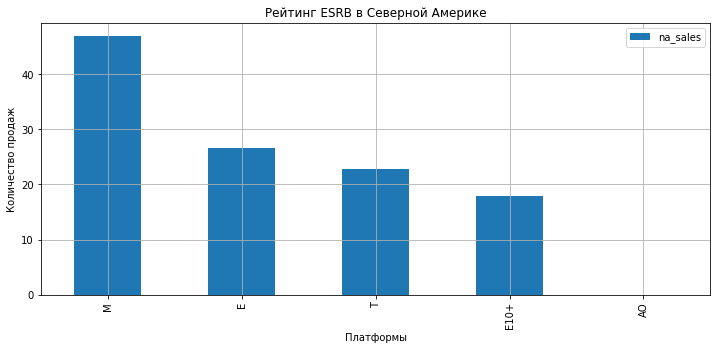

In [748]:
df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Рейтинг ESRB в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

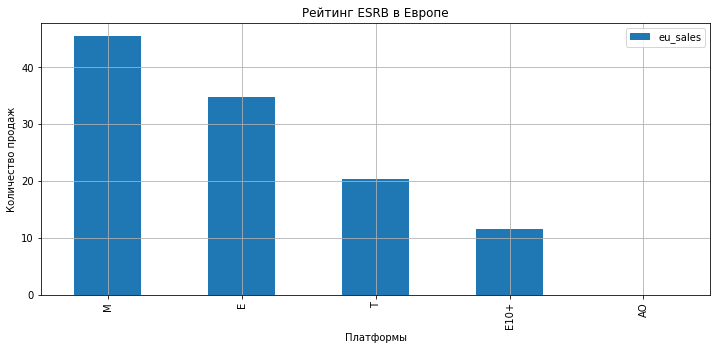

In [749]:
df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Рейтинг ESRB в Европе')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

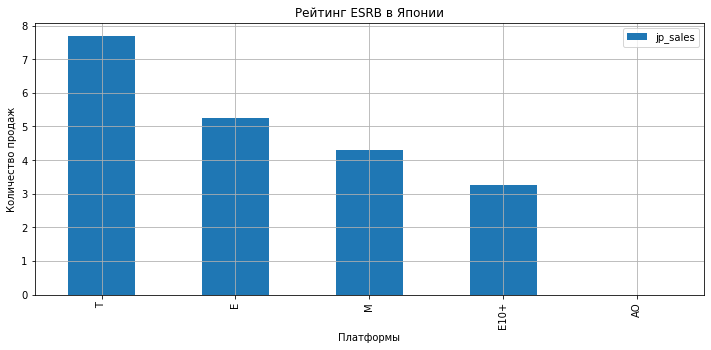

In [750]:
df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(grid=True, figsize=(12, 5), kind="bar")
plt.title('Рейтинг ESRB в Японии')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()

### Вывод

<div class="alert alert-block alert-info">
Самой популярной платформой в Северной Америке и Европе является PS4, в Японии - 3DS. При этом XOne занимает второе место по популярности в Северной Америке и Европе, в Японии же данная платформа не входит в топ-5.  <br>
Безоговорочным лидером в Северной Америке и Европе является жанр Shooter, в Японии же он уступает первенство жанрам Action и Role-Playing. При этом жанр Action занимает второе место в пятерке лидеров Северной Америки и Европы. <br>
Больше всего продаж у игр, имеющих знак рейтига M («Mature» — «Для взрослых»). В Северной Америке и Европе на втором месте по продажам игры, имеющие знак E («Everyone» — «Для всех»), при этом в Японии игры со знаком Е уступают первенство играм со знаком Т («Teen» — «Подросткам»). <br> 
На основе вышеизложенной информации, можно предположить, что в Северной Америке и Европе категория взрослых гейморов несколько больше, чем в Японии, они предпочитают более "жесткие" игры, в Японии же большее предпочтение отдают более "интеллектуальным" играм. 
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что обновила вывод

</div>

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Н0</b>: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>
<b>Н1</b>: средние пользовательские рейтинги платформ Xbox One и PC различные.

In [751]:
xone = df[(df['platform']=='XOne')]['user_score']
pc = df[(df['platform']=='PC')]['user_score']

In [752]:
xone.mean()

6.542148760330578

In [753]:
pc.mean()

6.296428571428573

In [754]:
alpha = 0.05

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


### Вывод

<div class="alert alert-block alert-info"> Гипотеза о равенстве средних пользовательских рейтингов Xbox One и PC подтвердилась. <div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно сформулировала и проверила гипотезу
</div>


### Средние пользовательские рейтинги жанров Action и Sports разные

<b>Н0</b>: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <br>
<b>Н1</b>: Средние пользовательские рейтинги жанров Action и Sports разные.

In [755]:
action = df[(df['genre']=='Action')]['user_score']
sports = df[(df['genre']=='Sports')]['user_score']

In [756]:
action.mean()

6.808290155440415

In [757]:
sports.mean()

5.198780487804878

In [758]:
alpha = 0.05

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.97163549920592e-10
Отвергаем нулевую гипотезу


### Вывод

Подтвердилась гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


## Вывод

В ходе исследовательской работы осуществлена предварительная подготовка данных для корректности последующей работы с ними. <br>
Результаты исследования показали, что сектор компьютерных игр переживает спад продаж, тем не менее можно определить стратегию его развития на 2017 год. <br>
Наиболее популярными игровыми платформами являются PS4, XOne, 3DS. <br>
В ходе исследования удалось установить, что оценка пользователей и критиков не оказывает существенного влияния на продажи. <br>
Что касается регионов продаж, то на северо-американском и европейском рынках наибольшим успехом пользуется платформа PS4, на японском - 3DS. Из жанров стоит выделить Shooter, Action, Role-Playing, Sports. При этом в Северной Америке и Европе большей популярностью пользуются игры для взрослых, в Японии - для подростков. <br>
В ходе исследования также было выдвинуто две гипотезы: о равенстве средних пользовательских рейтингов для Xbox One и PC, и о различии средних пользовательских рейтингов для жанров Action и Sports. Обе гипотезы нашли свое подтверждение. <br>
Таким образом, можно подытожить следующее: наиболее оптимальным будет продажа игр под платформы Sony Playstation 4, Nintendo 3DS, Xbox One; среди жанров стоит отдать предпочтение Shooter и Action; возрастная категория игр - для взрослых.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший вывод
</div>



<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справилась с анализом данных и проверкой гипотез.

Осталось немного доработать проект:

* изменить актуальный период
* посчитать медианные продажи игр по жанрам

Проверь, пожалуйста, свои выводы перед повторной отправкой проекта, потому что изменение актуального периода может повлиять на результаты исследования.

Жду твои исправления:)

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учла мои комментарии и обновила все выводы в проекте.    
    
Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>
